# Investigate datsets

In [2]:
import matplotlib.pyplot as plt
import numpy as np


## Look at the original (PNAS)

In [ ]:

sample_path = r'/scratch/ottosson/datasets/SAM/data/PNAS/plant1/processed_tiffs/0hrs_plant1_trim-acylYFP.tif'
label_path = r'/scratch/ottosson/datasets/SAM/data/PNAS/plant1/segmentation_tiffs/0hrs_plant1_trim-acylYFP_hmin_2_asf_1_s_2.00_clean_3.tif'
sample = imageio.volread(sample_path)
label = imageio.volread(label_path)
print("Sample shape: ", sample.shape)
print("Label shape: ", label.shape)
print("Sample dtype: ", sample.dtype)
print("Label dtype: ", label.dtype)

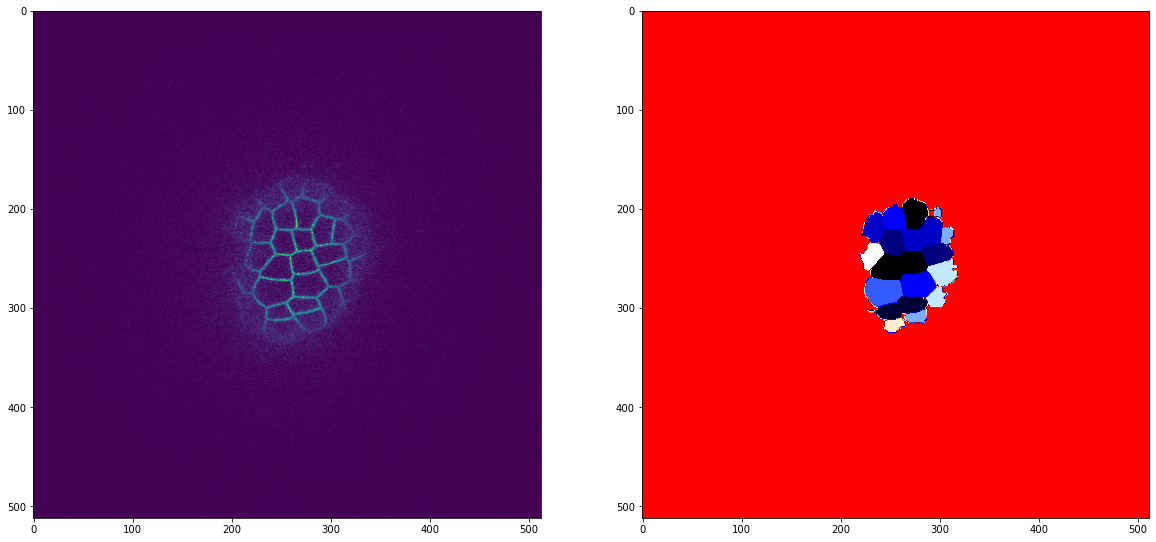

In [ ]:
z_i = 100
fig, axs = plt.subplots(1,2)
axs[0].imshow(sample[z_i], vmin=np.min(sample[z_i]), vmax=np.max(sample[z_i]))
axs[1].imshow(label[z_i],cmap = 'flag',vmin=np.min(label[z_i]), vmax=np.max(label[z_i]))
fig.set_size_inches(20,40)

## Look at Cellpose data

In [44]:
import imageio
import cellpose
sample_path = r'/scratch/ottosson/datasets/SAM/data/PNAS-Cellpose/sample_000_layer_000.tif'
label_path = r'/scratch/ottosson/datasets/SAM/data/PNAS-Cellpose/sample_000_layer_000_masks.tif'
sample_path = r'/scratch/ottosson/datasets/SAM/data/PNAS-temp/plant_000_sample_001_layer_000.tif'
label_path = r'/scratch/ottosson/datasets/SAM/data/PNAS-temp/plant_000_sample_001_layer_000_masks_flows.tif'
sample = imageio.volread(sample_path)
label = imageio.volread(label_path)
print("Sample shape: ", sample.shape)
print("Label shape: ", label.shape)
print("Sample dtype: ", sample.dtype)
print("Label dtype: ", label.dtype)

Sample shape:  (512, 512)
Label shape:  (4, 512, 512)
Sample dtype:  uint8
Label dtype:  float32


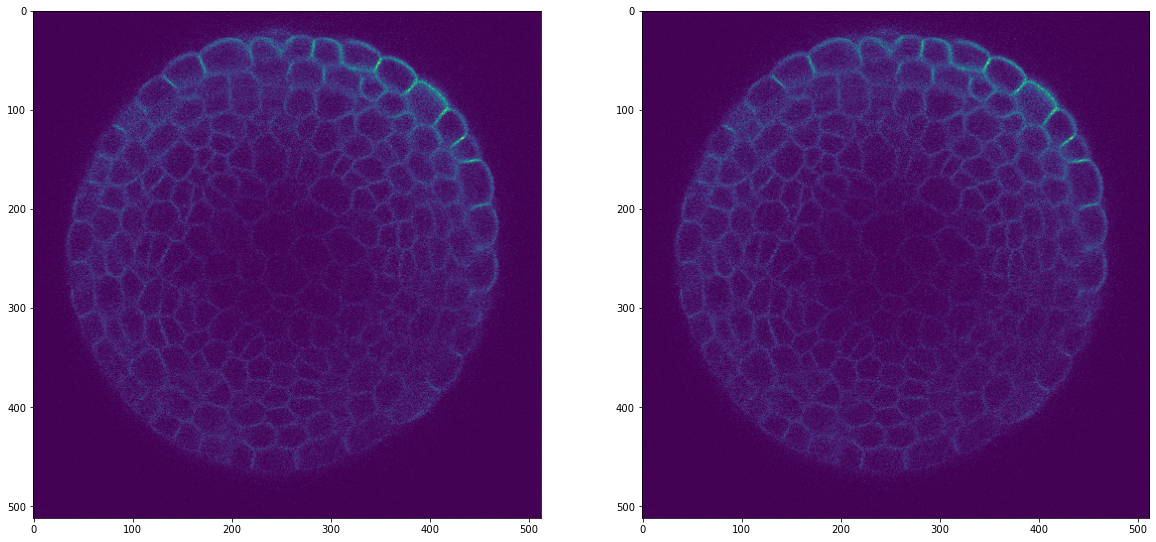

In [36]:
fig, axs = plt.subplots(1,2)
c_i = 0
axs[0].imshow(sample, vmin=np.min(sample), vmax=np.max(sample))
#axs[1].imshow(label,cmap = 'flag',vmin=np.min(label), vmax=np.max(label))
axs[1].imshow(label[c_i],vmin=np.min(label[c_i]), vmax=np.max(label[c_i]))
fig.set_size_inches(20,40)

In [1]:

!python -m cellpose --dir /scratch/ottosson/datasets/SAM/temp_data  --pretrained_model /scratch/ottosson/datasets/SAM/data/PNAS-Cellpose/models/cellpose_residual_on_style_on_concatenation_off_PNAS-Cellpose_2021_11_07_04_45_12.224249 --save_tif --no_npy --diameter 30.0

2021-11-08 13:00:01,215 [INFO] WRITING LOG OUTPUT TO /home/ottosson/.cellpose/run.log
2021-11-08 13:00:01,526 [INFO] >>>> using CPU
2021-11-08 13:00:01,530 [INFO] >>>> running cellpose on 1 images using chan_to_seg GRAY and chan (opt) NONE
2021-11-08 13:00:01,531 [INFO] parsing model string cellpose_residual_on_style_on_concatenation_off_PNAS-Cellpose_2021_11_07_04_45_12.224249 to get cellpose options
2021-11-08 13:00:01,813 [INFO] >>>> using diameter 30.00 for all images
2021-11-08 13:00:07,194 [INFO] 100%|##########| 1/1 [00:05<00:00,  5.38s/it]
2021-11-08 13:00:07,194 [INFO] >>>> completed in 5.668 sec


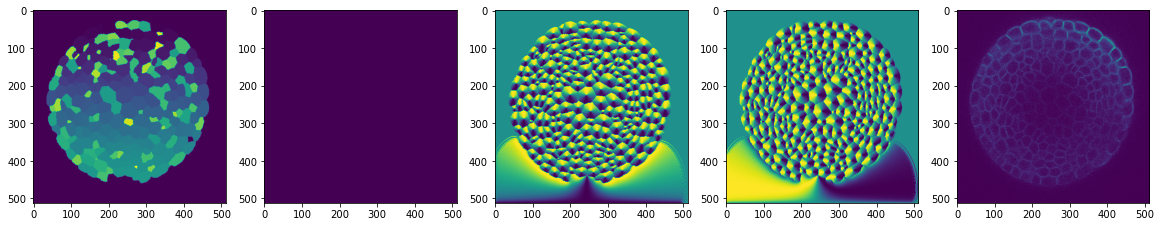

In [48]:
fig, axs = plt.subplots(1,5)
axs[0].imshow(label[0], vmin=np.min(label[0]), vmax=np.max(label[0]))
axs[1].imshow(label[1], vmin=np.min(label[1]), vmax=np.max(label[1]))
axs[2].imshow(label[2], vmin=np.min(label[2]), vmax=np.max(label[2]))
axs[3].imshow(label[3], vmin=np.min(label[3]), vmax=np.max(label[3]))
axs[4].imshow(sample, vmin=np.min(sample), vmax=np.max(sample))

fig.set_size_inches(20,80)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

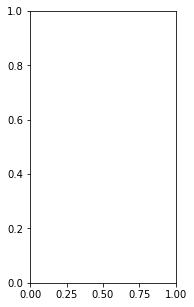

In [49]:

nimg = len(sample)
for idx in range(nimg):
    maski = label[idx][0]
    flowi = label[idx][2:3]

    fig = plt.figure(figsize=(12,5))
    cellpose.plot.show_segmentation(fig, sample[idx], maski, flowi)
    plt.tight_layout()
    plt.show()
    break

## Look at Plantseg data (PNAS-PlantSeg)

In [21]:
import h5py
with h5py.File('/scratch/ottosson/datasets/SAM/data/PNAS-PlantSeg/sample_97.h5', 'r') as hf:
    sample = hf['raw'][:]
    label = hf['label'][:]
print("Sample shape: ", sample.shape)
print("Label shape: ", label.shape)
print("Sample dtype: ", sample.dtype)
print("Label dtype: ", label.dtype)

Sample shape:  (249, 512, 512)
Label shape:  (249, 512, 512)
Sample dtype:  uint8
Label dtype:  uint16


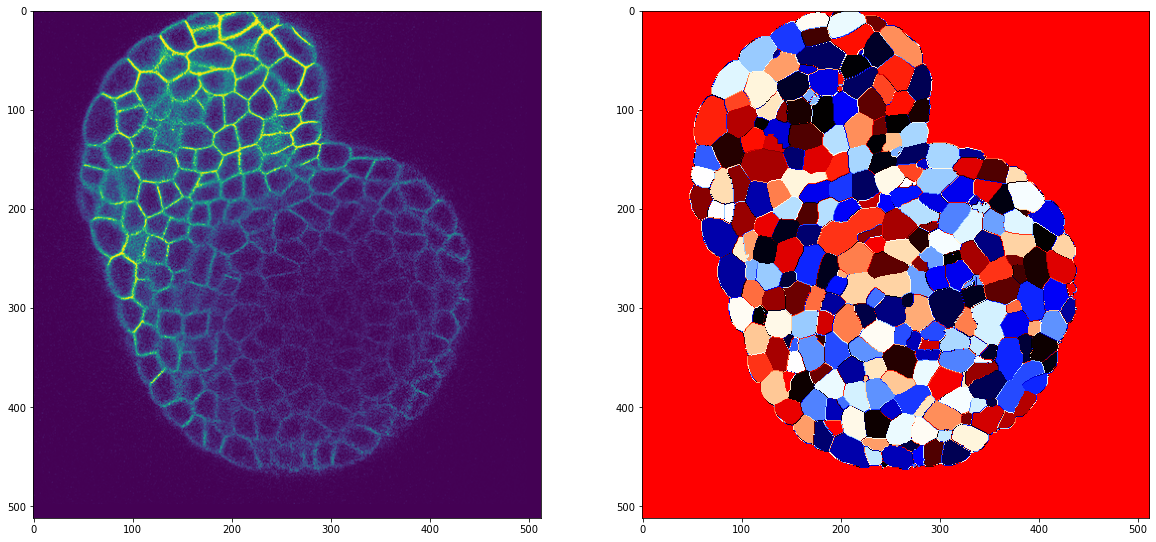

In [23]:
z_i = 100
fig, axs = plt.subplots(1,2)
axs[0].imshow(sample[z_i], vmin=np.min(sample[z_i]), vmax=np.max(sample[z_i]))
axs[1].imshow(label[z_i],cmap = 'flag',vmin=np.min(label[z_i]), vmax=np.max(label[z_i]))
fig.set_size_inches(20,40)